In [4]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [15]:
df_tesla = pdr.get_data_yahoo('TSLA', start=datetime(2017, 1, 1), end=datetime(2023, 2, 8))

[*********************100%***********************]  1 of 1 completed


In [16]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,14.324000,14.688667,14.064000,14.466000,14.466000,88849500
2017-01-04 00:00:00-05:00,14.316667,15.200000,14.287333,15.132667,15.132667,168202500
2017-01-05 00:00:00-05:00,15.094667,15.165333,14.796667,15.116667,15.116667,88675500
2017-01-06 00:00:00-05:00,15.128667,15.354000,15.030000,15.267333,15.267333,82918500
2017-01-09 00:00:00-05:00,15.264667,15.461333,15.200000,15.418667,15.418667,59692500


In [17]:
### simple moving average

<AxesSubplot: xlabel='Date'>

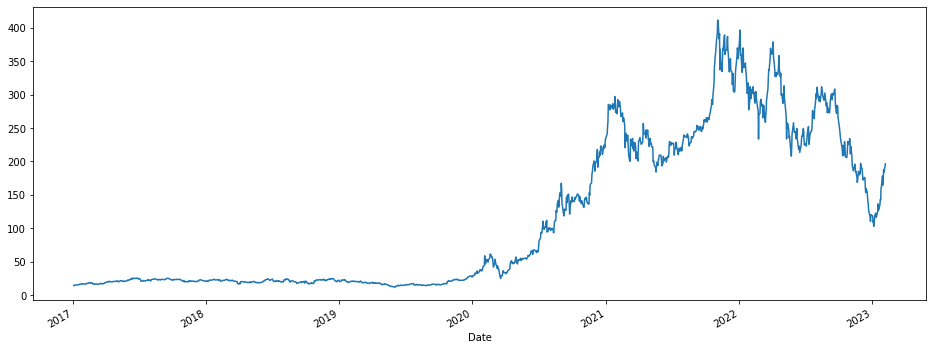

In [18]:
df_tesla['Open'].plot(figsize=(16,6), label='TSLA')

In [21]:
df_tesla['Open : 10 day rooling mean'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

In [22]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,Open : 10 day rooling mean
Date,,,,,,,
2017-01-03 00:00:00-05:00,14.324000,14.688667,14.064000,14.466000,14.466000,88849500,14.324000
2017-01-04 00:00:00-05:00,14.316667,15.200000,14.287333,15.132667,15.132667,168202500,14.320333
2017-01-05 00:00:00-05:00,15.094667,15.165333,14.796667,15.116667,15.116667,88675500,14.578445
2017-01-06 00:00:00-05:00,15.128667,15.354000,15.030000,15.267333,15.267333,82918500,14.716000
2017-01-09 00:00:00-05:00,15.264667,15.461333,15.200000,15.418667,15.418667,59692500,14.825734


<AxesSubplot: xlabel='Date'>

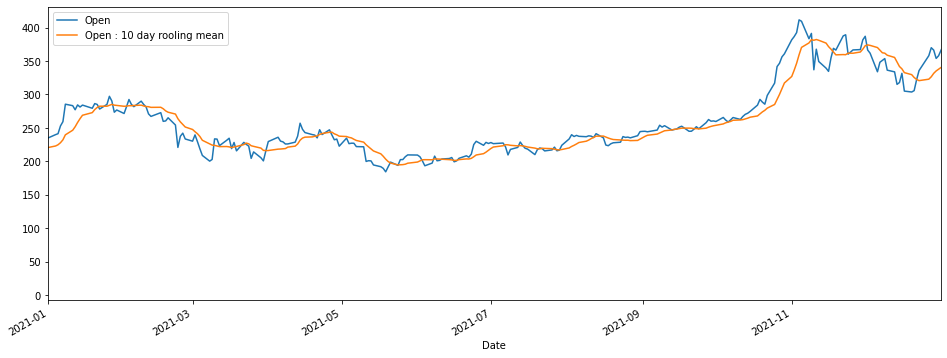

In [24]:
df_tesla[['Open','Open : 10 day rooling mean']].plot(xlim=['2021-1-1','2022-1-1'],figsize=(16,6))

In [25]:
df_tesla['Open : 30 day rooling mean'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open : 50 day rooling mean'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot: xlabel='Date'>

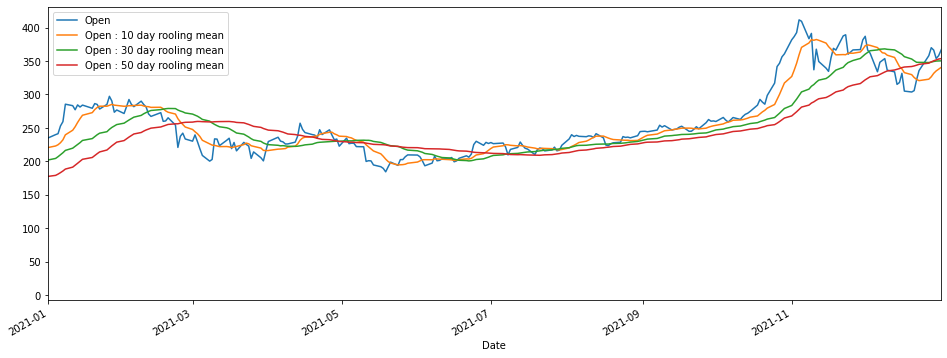

In [26]:
df_tesla[['Open','Open : 10 day rooling mean','Open : 30 day rooling mean','Open : 50 day rooling mean']].plot(xlim=['2021-1-1','2022-1-1'],figsize=(16,6))

### cumulative moving average

- this is a simple moving average, but instead of taking the average of the last n observations, it takes the average of all observations up to that point in time. This is useful for time series with a trend or one that exhibits seasonality.

<AxesSubplot: xlabel='Date'>

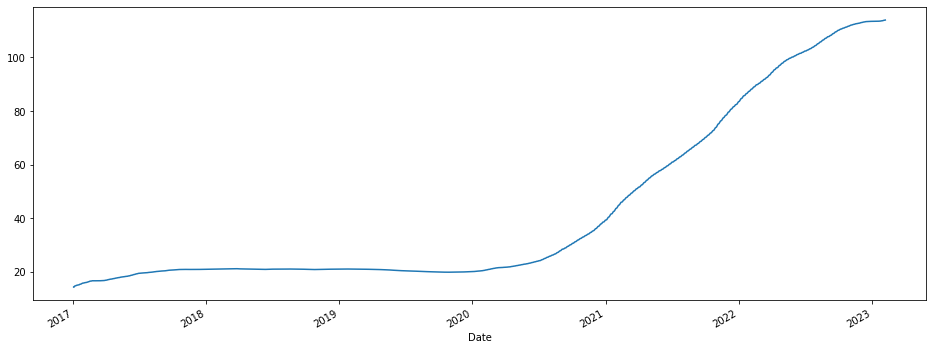

In [28]:
## exoanding 

df_tesla['Open'].expanding().mean().plot(figsize=(16,6), label='TSLA')


### EWMA (exponentially weighted moving average)

- this is a weighted average of the previous observations, with the weights decreasing exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.



In [30]:
## EMA tesla span 
## let's shmothing fectory 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot: xlabel='Date'>

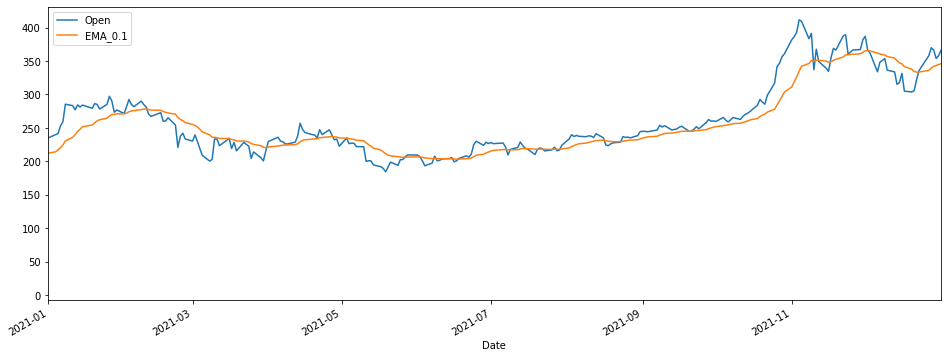

In [32]:

df_tesla[['Open','EMA_0.1']].plot(xlim=['2021-1-1','2022-1-1'],figsize=(16,6))

In [33]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

<AxesSubplot: xlabel='Date'>

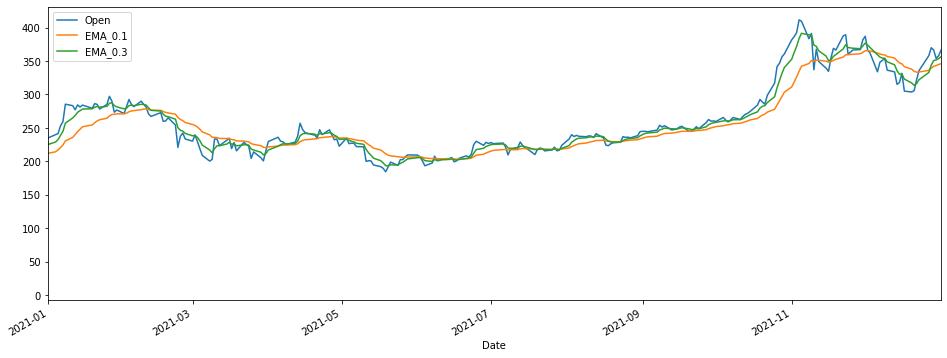

In [34]:

df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2021-1-1','2022-1-1'],figsize=(16,6))

In [35]:
df_tesla['EMA_5 day'] = df_tesla['Open'].ewm(span=5, adjust=False).mean()

<AxesSubplot: xlabel='Date'>

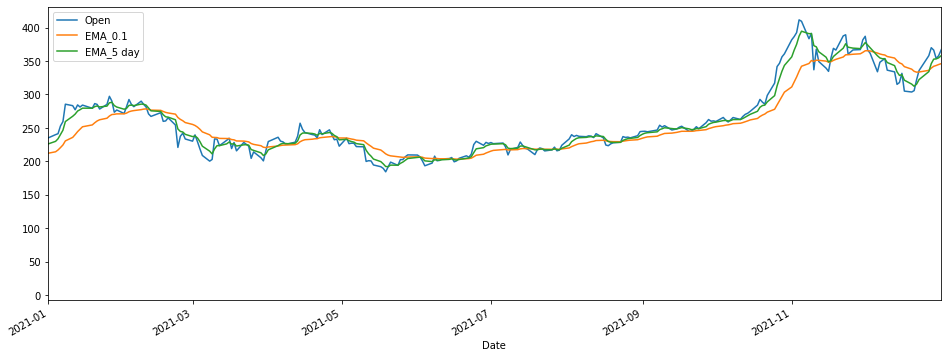

In [39]:
df_tesla[['Open','EMA_0.1','EMA_5 day']].plot(xlim=['2021-1-1','2022-1-1'],figsize=(16,6))

### ARIMA (autoregressive integrated moving average)

- ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

- ARIMA models are applied to time series data to better understand or predict future points in the series.



In [42]:

## ARIMA

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_tesla['Open'], order=(5,1,0))

results = model.fit()

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1535
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5092.668
Date:                Wed, 08 Feb 2023   AIC                          10197.337
Time:                        21:41:09   BIC                          10229.351
Sample:                             0   HQIC                         10209.250
                               - 1535                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0562      0.014     -3.990      0.000      -0.084      -0.029
ar.L2          0.0004      0.014      0.026      0.979      -0.027       0.028
ar.L3         -0.0110      0.016     -0.699      0.485      -0.042       0.020
ar.L4          0.0315      0.015      2.101      0.036       0.002       0.061
ar.L5         -0.0149      0.014     -1.052      0.293      -0.043       0.013
sigma2        44.7833      0.734     60.974      0.000      43.344      46.223
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5225.63
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):             285.63   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMAX (autoregressive integrated moving average with exogenous regressors)

- ARIMAX models are denoted with the notation ARIMAX(p, d, q)(P, D, Q)s. These six parameters account for seasonality, trend, noise in data, and exogenous regressors.

- ARIMAX models are applied to time series data to better understand or predict future points in the series.



### SARIMAX (seasonal autoregressive integrated moving average with exogenous regressors)

- SARIMAX models are denoted with the notation SARIMAX(p, d, q)(P, D, Q)s. These six parameters account for seasonality, trend, noise in data, and exogenous regressors.

- SARIMAX models are applied to time series data to better understand or predict future points in the series.

In [44]:
## ARIMAX

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_tesla['Open'], order=(5,1,0),exog=df_tesla['Volume'])

results = model.fit()

c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\utamp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 1535
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -5091.952
Date:                Wed, 08 Feb 2023   AIC                          10197.903
Time:                        21:43:05   BIC                          10235.253
Sample:                             0   HQIC                         10211.802
                               - 1535                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      3.445e-09    3.4e-09      1.012      0.312   -3.23e-09    1.01e-08
ar.L1         -0.0564      0.014     -4.008      0.000      -0.084      -0.029
ar.L2          0.0019      0.014      0.139      0.890      -0.025       0.029
ar.L3         -0.0114      0.016     -0.722      0.470      -0.042       0.019
ar.L4          0.0306      0.015      2.046      0.041       0.001       0.060
ar.L5         -0.0146      0.014     -1.027      0.304      -0.042       0.013
sigma2        44.8870   7.25e-05   6.19e+05      0.000      44.887      44.887
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5229.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):             238.50   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+20. Standard errors may be unstable.
"""